In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Description

* Population
* GDP
* DCT - $CO_{2}$ Emissions – Total - `CDI = CO2 Intensity Current-Year Score`
* DPT - $CO_{2}$ emissions/kWh elect. & heat - `CEH = CO2 Emissions per kWh`
* DMT - $CH_{4}$ emissions - `CHI = $CH_{4}$ Intensity Current-Year Score`
* DNT - $N_{2}O$ emissions - `NOI = $N_{2}O$ Intensity Current-Year Score`
* DBT - Black Carbon emissions - `BCI = Black Carbon Current-Year Score`

In [2]:
climate = pd.read_csv('data_2020.csv')

In [3]:
climate.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
climate.shape

(3094, 7)

In [5]:
climate.head(10)

,country,year,CDA,CHA,FGA,NDA,BCA
0,Albania,1995,100.000000,73.072520,0.000000,78.221486,100.000000
1,Algeria,1995,40.836434,98.636534,96.334651,72.620891,70.996796
2,Angola,1995,12.888007,70.729875,0.000000,100.000000,43.865361
3,Antigua and Barbuda,1995,44.483927,80.575637,0.000000,36.690524,68.683208
4,Argentina,1995,40.485271,100.000000,100.000000,63.435774,45.942816
5,Armenia,1995,72.726561,89.833401,0.000000,97.707838,100.000000
6,Australia,1995,42.566037,99.666890,100.000000,76.458848,82.549405
7,Austria,1995,50.903881,100.000000,92.800663,93.225015,100.000000
8,Azerbaijan,1995,60.416530,86.983408,100.000000,74.176342,88.589201
9,Bahrain,1995,25.727473,33.991729,100.000000,43.459231,42.950239


# `Time Series` for 2021-2027 per country

In [6]:
from statsmodels.tsa.ar_model import AR
import datetime

In [7]:
countries = list(climate['country'].unique())
len(countries)

119

In [8]:
climate.isna().sum() # checking missing values

country    0
year       0
CDA        0
CHA        0
FGA        0
NDA        0
BCA        0
dtype: int64

In [9]:
cda = []
cha = []
fga = []
nda = []
bca = []

In [10]:
# CDA time series

for country in countries:
    df = climate[climate['country']==str(country)].reset_index()
    #df.index = pd.to_datetime(df['year'],format='%Y')#.dt.year
    features1 = df['CDA']
    model1 = AR(features1)
    model1_fit = model1.fit(maxlag=3)
    d_f1 = model1_fit.predict(start=len(features1), end=len(features1)+6, dynamic=False)
    cda += d_f1.to_list()
    #print('Country {0} completed'.format(country))

In [11]:
# CHA time series

for country in countries:
    df = climate[climate['country']==str(country)].reset_index()
    #df.index = pd.to_datetime(df['year'],format='%Y')#.dt.year
    features = df['CHA']
    if len((climate[climate['country']==str(country)]['CHA']).unique()) == 1:
        cha_ = features[:7].tolist()
        cha+=cha_
    else:
        model = AR(features)
        model_fit = model.fit(maxlag=3)
        d_f = model_fit.predict(start=len(features), end=len(features)+6, dynamic=False)
        cha+=d_f.to_list()
    #print('Country {0} completed'.format(country)) # problems with values repetition

In [12]:
# FGA time series

for country in countries:
    df = climate[climate['country']==str(country)].reset_index()
    #df.index = pd.to_datetime(df['year'],format='%Y')#.dt.year
    features = df['FGA']
    if len((climate[climate['country']==str(country)]['FGA']).unique()) == 1:
        fga_ = features[:7].tolist()
        fga+=fga_
    else:
        model = AR(features)
        model_fit = model.fit(maxlag=3)
        d_f = model_fit.predict(start=len(features), end=len(features)+6, dynamic=False)
        fga+=d_f.to_list()
    #print('Country {0} completed'.format(country))

In [13]:
# NDA time series

for country in countries:
    df = climate[climate['country']==str(country)].reset_index()
    #df.index = pd.to_datetime(df['year'],format='%Y')#.dt.year
    features = df['NDA']
    model = AR(features)
    model_fit = model.fit(maxlag=3)
    d_f = model_fit.predict(start=len(features), end=len(features)+6, dynamic=False)
    nda+=d_f.to_list()
    #print('Country {0} completed'.format(country))

In [14]:
# BCA time series

for country in countries:
    df = climate[climate['country']==str(country)].reset_index()
    #df.index = pd.to_datetime(df['year'],format='%Y')#.dt.year
    features = df['BCA']
    if len((climate[climate['country']==str(country)]['BCA']).unique()) == 1:
        bca_ = features[:7].tolist()
        bca+=bca_
    else:
        model = AR(features)
        model_fit = model.fit(maxlag=3)
        d_f = model_fit.predict(start=len(features), end=len(features)+6, dynamic=False)
        bca+=d_f.to_list()
    #print('Country {0} completed'.format(country))

## We have to generate total 833 predictions

In [15]:
print('The CDA columns has {0} predictions'.format(len(cda)))
print('The CHA columns has {0} predictions'.format(len(cha)))
print('The FGA columns has {0} predictions'.format(len(fga)))
print('The NDA columns has {0} predictions'.format(len(nda)))
print('The BCA columns has {0} predictions'.format(len(bca)))

The CDA columns has 833 predictions
The CHA columns has 833 predictions
The FGA columns has 833 predictions
The NDA columns has 833 predictions
The BCA columns has 833 predictions


In [16]:
df_cda = pd.DataFrame({'CDA':cda})
df_cha = pd.DataFrame({'CHA':cha})
df_fga = pd.DataFrame({'FGA':fga})
df_nda = pd.DataFrame({'NDA':nda})
df_bca = pd.DataFrame({'BCA':bca})

In [17]:
print('The CDA columns has {0} predictions'.format(df_cda.shape[0]))
print('The CHA columns has {0} predictions'.format(df_cha.shape[0]))
print('The FGA columns has {0} predictions'.format(df_fga.shape[0]))
print('The NDA columns has {0} predictions'.format(df_nda.shape[0]))
print('The BCA columns has {0} predictions'.format(df_bca.shape[0]))

The CDA columns has 833 predictions
The CHA columns has 833 predictions
The FGA columns has 833 predictions
The NDA columns has 833 predictions
The BCA columns has 833 predictions


In [18]:
years = [num for num in range(2021,2028)]
year = pd.DataFrame({'year':years*119})
year.shape

(833, 1)

In [19]:
countries_total = []
for i in countries:
    for j in range(0,7):
        countries_total.append(i)

In [20]:
len(countries_total)

833

In [21]:
data = pd.DataFrame(countries_total,columns=['country'])
climate_pred = data.join(year)

In [22]:
climate_pred = climate_pred.join(df_cda)
climate_pred = climate_pred.join(df_cha)
climate_pred = climate_pred.join(df_fga)
climate_pred = climate_pred.join(df_nda)
climate_pred = climate_pred.join(df_bca)

In [23]:
climate_pred.shape

(833, 7)

In [24]:
climate_pred.describe()

,year,CDA,CHA,FGA,NDA,BCA
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2024.000000,46.927990,70.178301,90.192226,59.149739,57.760642
std,2.001202,19.318147,24.118012,6.441016,23.532881,28.317474
min,2021.000000,-20.283220,0.365263,58.798376,-22.226431,-1.633239
25%,2022.000000,35.178317,54.443601,87.930536,45.057044,37.291466
50%,2024.000000,48.918575,74.304786,90.787452,61.724836,57.494537
75%,2026.000000,59.984871,91.204499,93.946316,76.995678,82.247176
max,2027.000000,99.887811,106.433342,101.166693,99.981576,106.087037


In [25]:
def min_pred(row):
    if row <= 0:
        return 0
    elif row >= 100:
        return 100
    else:
        return row

In [26]:
climate_pred['CDA'] = climate_pred['CDA'].apply(lambda x: 0 if x<=0 else x)
climate_pred['CHA'] = climate_pred['CHA'].apply(lambda x: 0 if x<=0 else x)
climate_pred['FGA'] = climate_pred['FGA'].apply(lambda x: 0 if x<=0 else x)
climate_pred['NDA'] = climate_pred['NDA'].apply(lambda x: 0 if x<=0 else x)
climate_pred['BCA'] = climate_pred['BCA'].apply(lambda x: 0 if x<=0 else x)

In [27]:
climate_pred['CDA'] = climate_pred['CDA'].apply(lambda x: 100 if x>=100 else x)
climate_pred['CHA'] = climate_pred['CHA'].apply(lambda x: 100 if x>=100 else x)
climate_pred['FGA'] = climate_pred['FGA'].apply(lambda x: 100 if x>=100 else x)
climate_pred['NDA'] = climate_pred['NDA'].apply(lambda x: 100 if x>=100 else x)
climate_pred['BCA'] = climate_pred['BCA'].apply(lambda x: 100 if x>=100 else x)

In [28]:
climate_pred.describe()

,year,CDA,CHA,FGA,NDA,BCA
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2024.000000,47.085441,70.138578,90.189619,59.287409,57.723775
std,2.001202,18.872389,24.065827,6.436861,23.144158,28.198986
min,2021.000000,0.000000,0.365263,58.798376,0.000000,0.000000
25%,2022.000000,35.178317,54.443601,87.930536,45.057044,37.291466
50%,2024.000000,48.918575,74.304786,90.787452,61.724836,57.494537
75%,2026.000000,59.984871,91.204499,93.946316,76.995678,82.247176
max,2027.000000,99.887811,100.000000,100.000000,99.981576,100.000000


In [29]:
final_df = []
for country in countries:
    df1 = climate[climate['country']==str(country)].reset_index()
    df2 = climate_pred[climate_pred['country']==str(country)].reset_index()
    final = df1.append(df2)
    final = final.reset_index()
    final.drop(columns=['level_0','index'],inplace=True)
    final_df.append(final)

In [30]:
def list_to_df(lst):
    df = lst[0]
    for item in range(1,len(lst)):
        df = df.append(lst[item])
    return df

In [31]:
all_pred_2020 = list_to_df(final_df)

In [32]:
all_pred_2020 = all_pred_2020.reset_index()
all_pred_2020.drop(columns=['index'],inplace=True)

In [33]:
all_pred_2020.shape

(3927, 7)

In [34]:
len(countries)*len(all_pred_2020['year'].unique())

3927

In [37]:
all_pred_2020.describe()

,year,CDA,CHA,FGA,NDA,BCA
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000
mean,2011.000000,46.041716,70.007821,79.813079,60.239741,59.409586
std,9.523117,20.168466,27.478758,24.015765,27.604722,30.906983
min,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,33.327305,52.283540,76.768697,41.306883,36.240169
50%,2011.000000,46.330144,75.521607,88.870377,62.579480,59.103345
75%,2019.000000,59.016327,96.252055,93.099878,80.547486,89.694149
max,2027.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Export xlsx and csv

In [132]:
climate_pred.to_csv('climate_pred_2020.csv')
climate_pred.to_excel('climate_pred_2020.xlsx')

In [133]:
all_pred_2020.to_csv('climate_all_pred_2020.csv')

# `Survival Analysis` to predict which variable represents the biggest change concern

In [26]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [27]:
test = climate[climate['country']==str(countries[0])].reset_index()
test.head(26)

,index,country,year,CDA,CHA,FGA,NDA,BCA
0,0,Albania,1995,100.000000,73.072520,0.000000,78.221486,100.000000
1,119,Albania,1996,100.000000,73.072520,0.000000,78.221486,100.000000
2,238,Albania,1997,100.000000,73.072520,0.000000,78.221486,100.000000
3,357,Albania,1998,100.000000,73.072520,0.000000,78.221486,100.000000
4,476,Albania,1999,100.000000,73.072520,0.000000,78.221486,100.000000
5,595,Albania,2000,74.923269,76.760669,0.000000,63.022453,48.045073
6,714,Albania,2001,39.235149,85.603156,18.915822,68.296950,0.000000
7,833,Albania,2002,18.968655,100.000000,40.199894,71.154023,0.000000
8,952,Albania,2003,1.230429,100.000000,51.079315,71.641696,0.000000
9,1071,Albania,2004,0.000000,100.000000,57.123048,60.929528,0.000000


### Have to be a column with 0 and 1 

In [28]:
z = [ row.CDA + row.CHA + row.FGA + row.NDA + row.BCA for index, row in test.iterrows() ]

In [29]:
test['sum'] = z
test['dead'] = test['sum'].apply(lambda x: 1 if x>=500*0.8 else 0)

In [30]:
test.drop(columns=['index','country','sum'],inplace=True)

In [31]:
cph = CoxPHFitter()
cph.fit(test,'year',event_col='dead')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 26 total observations, 22 right-censored observations>
             duration col = 'year'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 26
number of events observed = 4
   partial log-likelihood = -6.23
         time fit was run = 2020-12-07 17:28:29 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
CDA         0.03       1.04       0.60            -1.13             1.20                 0.32                 3.32
CHA         0.02       1.02       0.31            -0.60             0.63                 0.55                 1.88
FGA        -0.03       0.97       2.21            -4.36             4.30                 0.01                73.74
NDA         0.00       1.00       0.14            -0.27             0.28                 0.76                 1.33
BCA        -0.04       0.96       0.73            -1.47             1.38                 0.23                 3.97

              z    p   -log2(p)
covariate                      
CDA        0.06 0.95       0.07
CHA        0.06 0.96       0.07
FGA       -0.01 0.99       0.01
NDA        0.03 0.98       0.03
BCA       -0.06 0.95       0.07
---
Concordance = 1.00
Partial AIC = 22.46
log-likelihood ratio test = 3.57 on 5 df
-log2(p) of ll-ratio test = 0.71

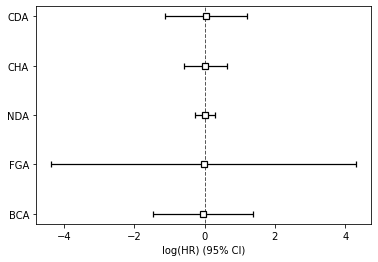

In [32]:
cph.plot()
plt.savefig('survival_test.png')